In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
!wget https://github.com/forero/abacus/raw/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat

--2019-02-13 21:08:39--  https://github.com/forero/abacus/raw/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/forero/abacus/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat [following]
--2019-02-13 21:08:40--  https://raw.githubusercontent.com/forero/abacus/master/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts/sphere_data_cut_0.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 779142 (761K) [text/plain]
Saving to: ‘sphere_data_cut_0.dat’

sphere_data_cut_0.d 100%[===================>] 760,88K  1,26MB/s 

In [3]:
seed = 20190213
np.random.seed(seed)
Radius = 100
VOID_TYPE = "REAL"
N = 20000     ################ The double!!!   N_rc = 2 * N_oc

In [4]:
def sph_random_point():
    u = np.random.rand()
    x1 = np.random.normal()
    x2 = np.random.normal()
    x3 = np.random.normal()
    
    norm = np.sqrt( x1**2 + x2**2 + x3**2)
    x1 /= norm
    x2 /= norm
    x3 /= norm
    
    r = Radius * u ** (1/3)
    
    return  [r*x1,r*x2,r*x3] 

In [5]:
RC = np.zeros([N,3])
for x in RC:
    x += sph_random_point()
np.savetxt("rnd_sph_cat_R100_seed20190213.cat", RC)


OC = np.loadtxt("./sphere_data_cut_0.dat")
OC = OC + 400


FC = np.vstack([RC,OC])
np.savetxt("FC_N{}_{}.cat".format(N,VOID_TYPE), FC)

<IPython.core.display.Javascript object>


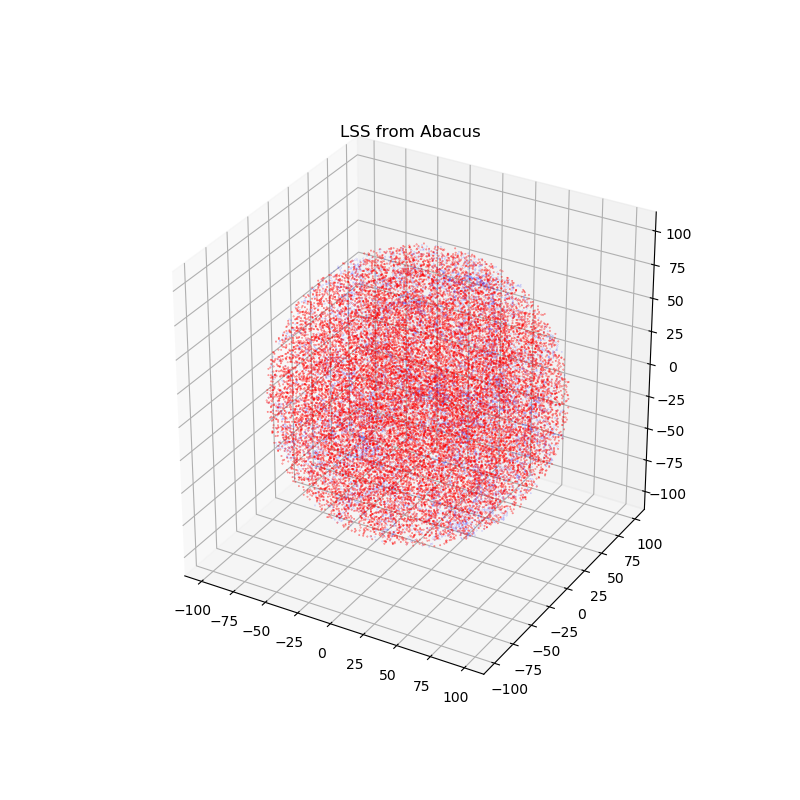

Text(0.5,0.92,'LSS from Abacus')

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


X = OC[:,0]
Y = OC[:,1]
Z = OC[:,2]

ax.scatter(X, Y, Z, c="blue", s=0.01)

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

ax.scatter(X, Y, Z, c="red", s=0.1)


plt.title("LSS from Abacus")




In [7]:
!make NPARTICLES=$N VOID_TYPE=$VOID_TYPE 

Input File FC_N20000_REAL.cat
cp FC_N20000_REAL.cat 4dLyx06Ujj

Calling NGL
/home/filipo/master_thesis/ngl-beta/build/binsrc/./getNeighborGraph -i 4dLyx06Ujj -d 3 -m BSkeleton -b 1.0c > FC_N20000_REAL_Beta1.0.bsk
Ellapsed time: 5356.582031 s.
Output file: FC_N20000_REAL_Beta1.0.bsk
Deleting auxiliar file
rm 4dLyx06Ujj


In [8]:
!ls -lt

total 7388
-rw-rw-r-- 1 filipo filipo  467937 feb 13 22:39 abacus_first_test.ipynb
-rw-rw-r-- 1 filipo filipo 2474342 feb 13 22:38 FC_N20000_REAL_Beta1.0.bsk
-rw-rw-r-- 1 filipo filipo 2293399 feb 13 21:08 FC_N20000_REAL.cat
-rw-rw-r-- 1 filipo filipo 1529835 feb 13 21:08 rnd_sph_cat_R100_seed20190213.cat
-rw-rw-r-- 1 filipo filipo  779142 feb 13 21:08 sphere_data_cut_0.dat
-rw-rw-r-- 1 filipo filipo     762 feb 13 21:05 Makefile
-rw-rw-r-- 1 filipo filipo     751 feb 13 21:05 Makefile~


# Loading the Full Catalog Beta-Skeleton graph

In [9]:
fcBSkel = np.loadtxt("FC_N{}_REAL_Beta1.0.bsk".format(str(N)))
fcBSkel.shape

(220448, 2)

In [10]:
index = np.where(fcBSkel[:,0] < N)

first_filter = np.array(fcBSkel[index]).astype(int)


In [11]:
print(N)

index = np.where( first_filter[:,1] >= N )[0]

droplist_raw = first_filter[index,0]
droplist = set(droplist_raw)

print( "First filter shape:", first_filter.shape, 
      "\nHow many of them have direct connections with galaxies", len(droplist) )

20000
First filter shape: (154505, 2) 
How many of them have direct connections with galaxies 15081


In [12]:
rndmcat_index = set(range(N))

candidates = rndmcat_index.difference(droplist)
candidates = list(candidates)
void_cat = FC[candidates]

<IPython.core.display.Javascript object>


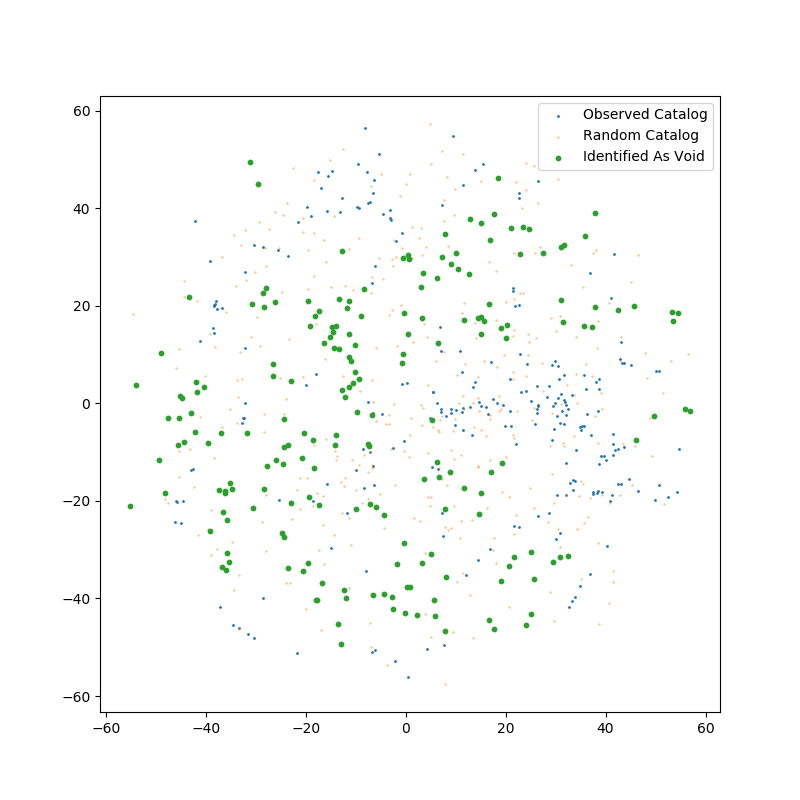

<IPython.core.display.Javascript object>


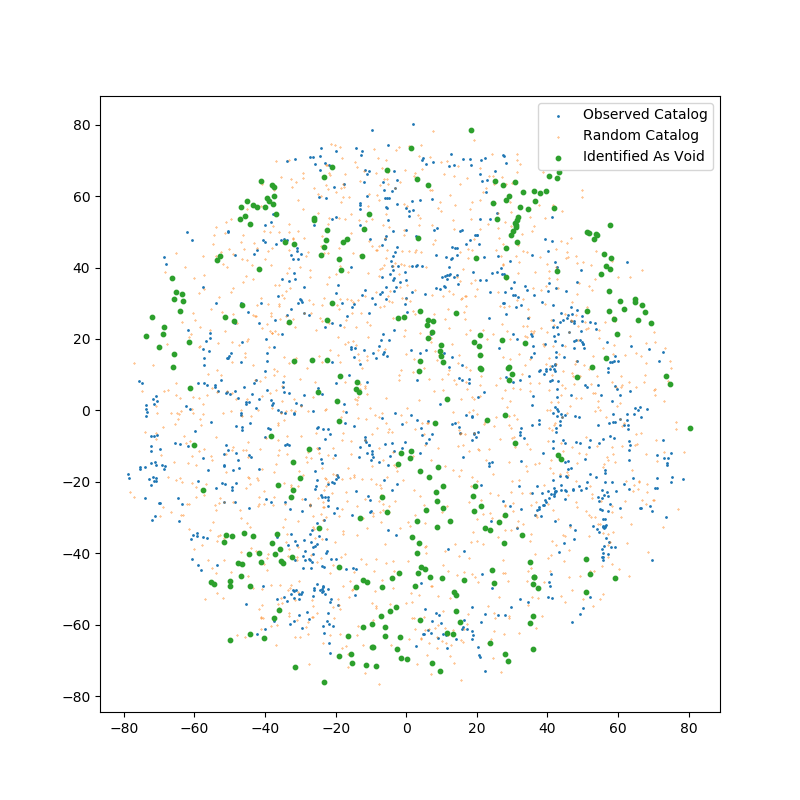

<IPython.core.display.Javascript object>


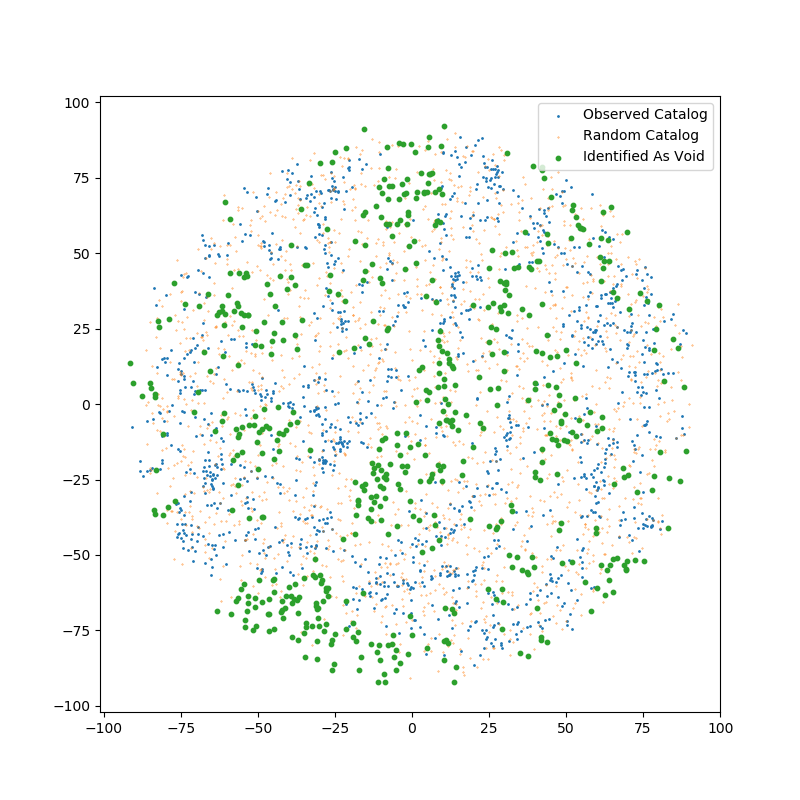

<IPython.core.display.Javascript object>


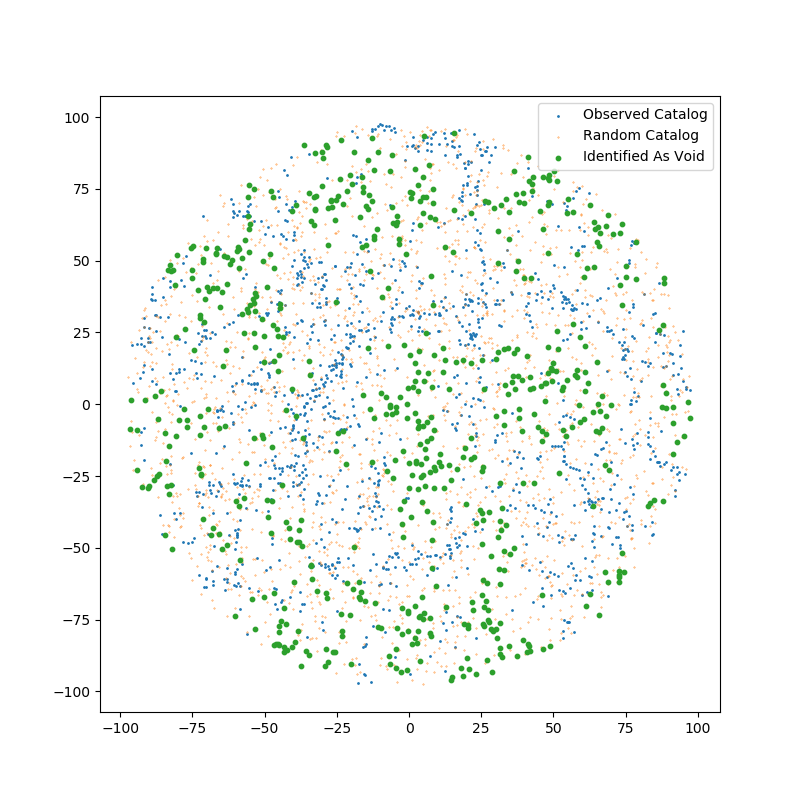

<IPython.core.display.Javascript object>


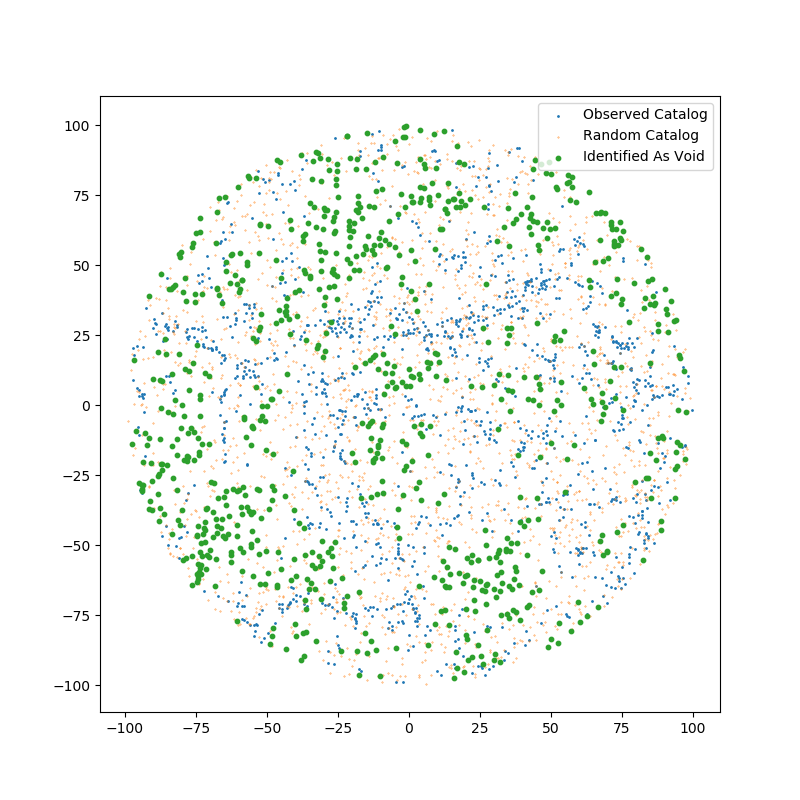

<IPython.core.display.Javascript object>


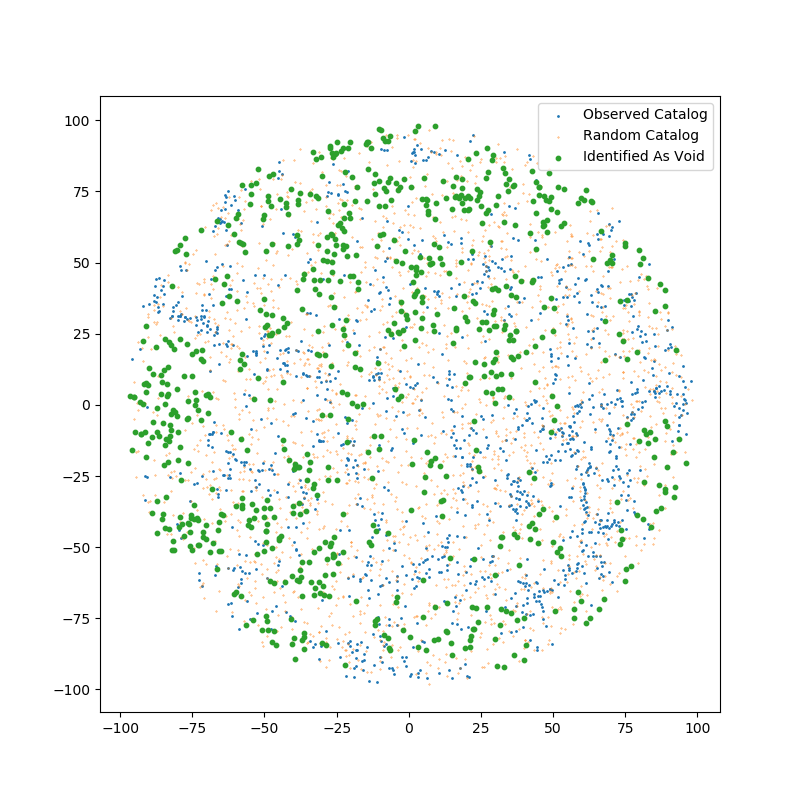

<IPython.core.display.Javascript object>


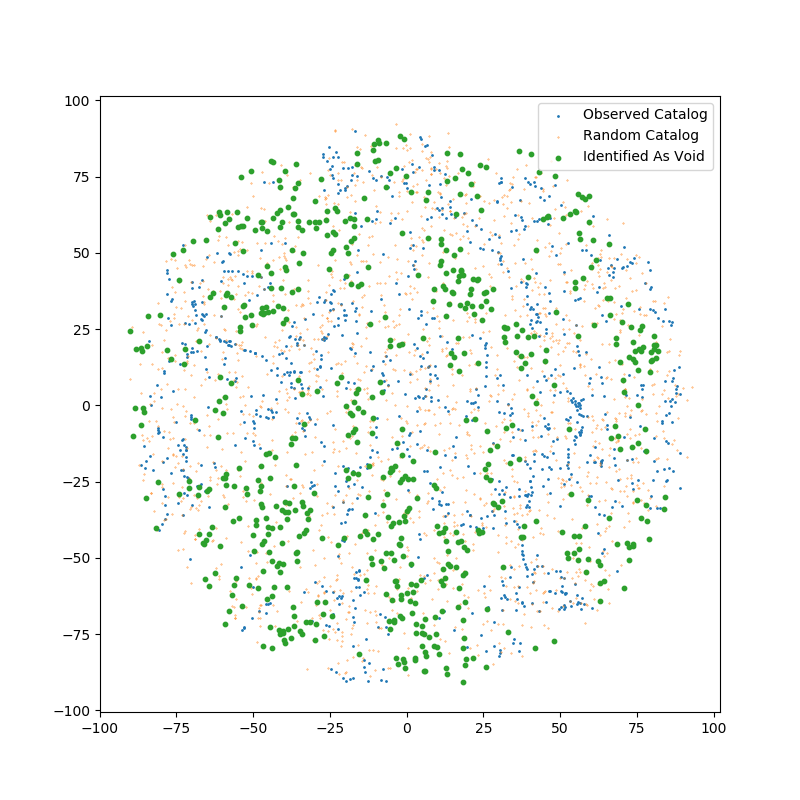

<IPython.core.display.Javascript object>


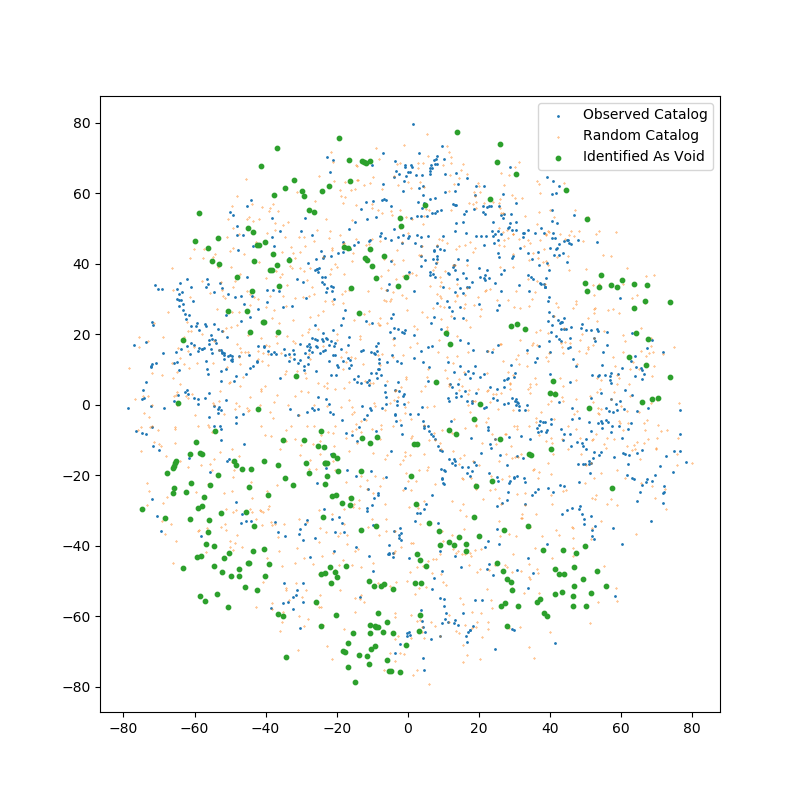

<IPython.core.display.Javascript object>


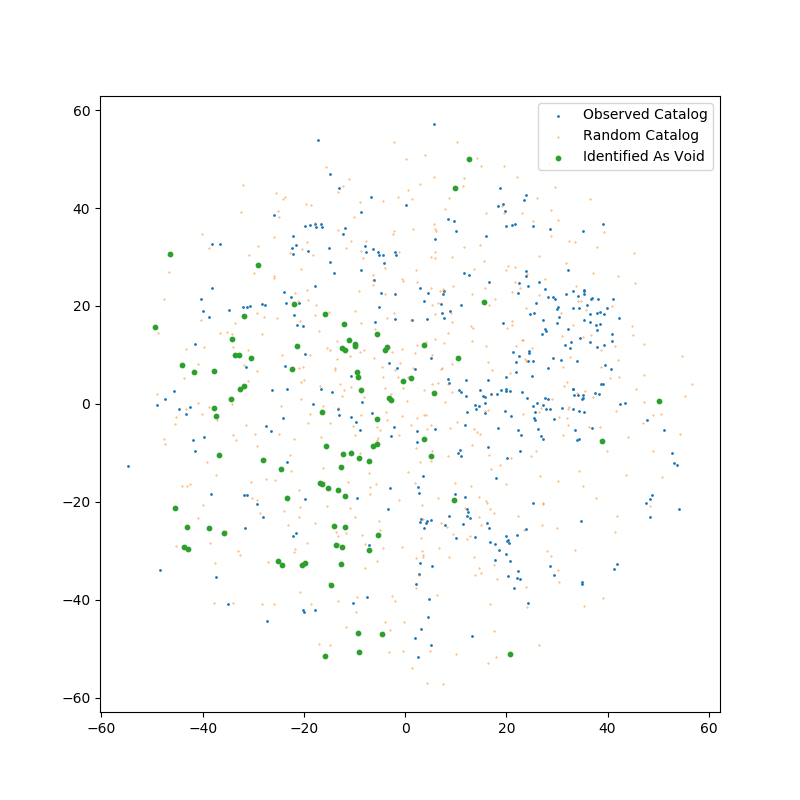

In [13]:
for k in np.linspace(-90,90,9):
    slice_height = 10
    BoxCenter = k

    fig = plt.figure(figsize=[8,8])

    index = np.where( abs(OC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(OC[index,0], OC[index,1], s=1, label="Observed Catalog")

    index = np.where( abs(RC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(RC[index,0], RC[index,1], s=0.1, label="Random Catalog")

    index = np.where( abs(void_cat[:,2] - BoxCenter) < slice_height )        
    plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

    plt.legend(loc=1)

<IPython.core.display.Javascript object>


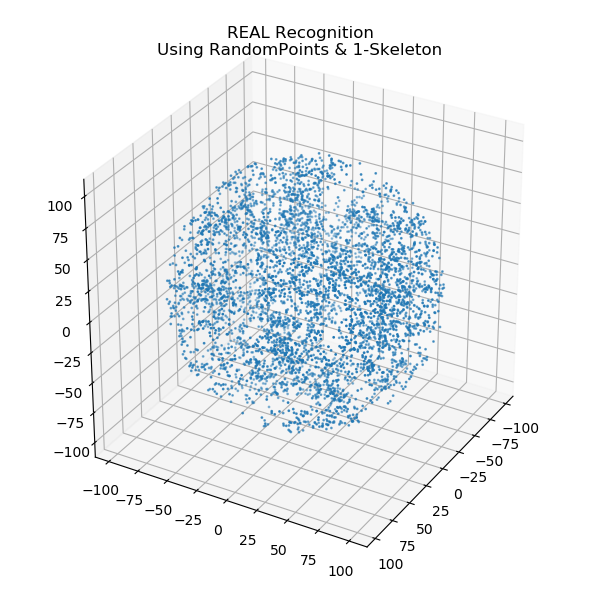

In [14]:
x = void_cat[:,0]
y = void_cat[:,1]
z = void_cat[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=1)
ax.view_init(30, 30)

plt.title(VOID_TYPE +" Recognition" + "\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()

#plt.close()

plt.show()


In [15]:
index=[]

for k in candidates:
    index.extend( list( np.where( fcBSkel[:,0] == k)[0].astype(int) ) )

index = list(set(index ) )
index.sort()

# Beta-Skeleton of Voids
VoidsBS = np.array(fcBSkel[index]).astype(int)
print(VoidsBS.shape)
print(len(candidates))

(34447, 2)
4919


In [16]:
np.savetxt("BS_of_Voids.bsk", VoidsBS)

In [17]:
candidates.sort()

In [18]:
MasterList = []

for search in candidates:
    
    is_in_master = any( search in sublist for sublist in MasterList)

    #print ( "Is", search, "in MasterList?", is_in_master)
    
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []

        index = np.where(VoidsBS[:,0] == search)
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        MasterList.append(my_list)

    if is_in_master:
        repetitions = []
        
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                #print("Si está en la sublista", k, sublist)
                repetitions.append(k)
                
        #print(search, "appears in sublists:" , repetitions)
        

        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
 
            #print("Index:", index)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
        
        elif (len(repetitions) > 1):
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j])
                MasterList[j]=[]
            my_list.sort()
            MasterList.append(my_list)
            
while( [] in MasterList):
    MasterList.remove([])

In [19]:
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

In [20]:
to_merge = []

for i in range(len(MasterList)):
    for j in range(len(MasterList)):
        if (j > i):
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            if (len(aux)>0):
                # print( i, j, aux)
                to_merge.append([i,j])

In [21]:
to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    is_in_list1 = any( x in sublist for sublist in to_merge2 )
    is_in_list2 = any( y in sublist for sublist in to_merge2 )
    
    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
    
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
            aux = []
            for j in range(len(to_merge2)):
                if( y in to_merge2[j]):
                    to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
            aux = []
            for j in range(len(to_merge2)):
                if( x in to_merge2[j]):
                    to_merge2[j].append(y)

    
for x in to_merge2:
    x.sort()
    
print( to_merge2)

[[1, 12, 107, 156, 192, 209, 212, 268, 388, 424, 463, 489, 509], [2, 166, 181, 371, 412, 447, 511], [3, 158, 276, 358, 385, 408, 425, 436], [4, 7, 51, 260, 264, 471, 510, 524], [5, 201, 516], [6, 52, 54, 59, 66, 68, 71, 83, 125, 145, 152, 184, 195, 218, 258, 272, 274, 281, 288, 289, 310, 330, 334, 345, 352, 361, 365, 370, 377, 381, 406, 413, 434, 442, 454, 493, 500, 501, 521], [8, 20, 297, 301, 306], [10, 86, 228, 390, 449, 458, 470, 505, 520], [11, 438], [13, 25, 44, 65, 70, 77, 101, 170, 180, 185, 203, 225, 239, 240, 242, 270, 280, 338, 350, 353, 394, 459, 462, 488, 491, 492, 495, 506, 517], [14, 99, 117, 135, 279, 383, 389, 419], [15, 300, 378], [16, 322, 440], [17, 48], [18, 251, 379], [19, 31, 37, 45, 115, 119, 138, 139, 197, 199, 221, 227, 271, 312, 331, 354, 398, 404, 421, 453, 464, 487, 519], [21, 123, 515], [22, 174, 217, 220], [23, 32, 113, 160, 161, 173, 222, 482, 522], [24, 215, 234, 395, 525], [26, 42, 81, 172, 448], [27, 43, 111, 144, 238], [28, 405], [29, 93], [30, 176],

In [22]:
for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
    aux.sort()
    MasterList.append(aux)
    
while( [] in MasterList):
    MasterList.remove([])
    

colors = cm.rainbow( np.linspace(0,1, len(MasterList)))



<IPython.core.display.Javascript object>


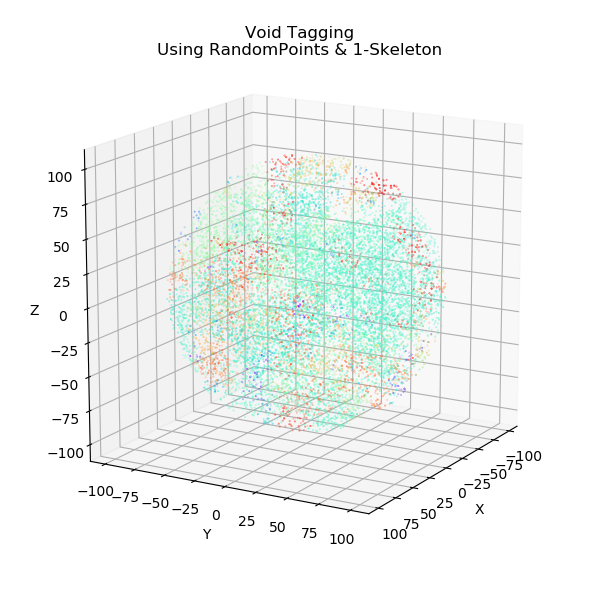

In [23]:
x = RC[:,0]
y = RC[:,1]
z = RC[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

for k in range(len(MasterList)): 
    void = MasterList[k]
    ax.scatter(x[void], y[void], z[void], s=0.1, c=colors[k])

ax.view_init(15, 30)

plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()


plt.savefig("./tagging_voids.pdf", format="pdf")
#plt.close()

plt.show()